In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [25]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [26]:
df.shape

(2713, 7)

In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555058,11323.914637,11323.914637,1.470462e+10
std,16106.428892,16537.390649,15608.572561,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399410,10762.644530,10202.387700,10462.259770,10462.259770,2.456992e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.5+ KB


In [ ]:
#Following by EDA

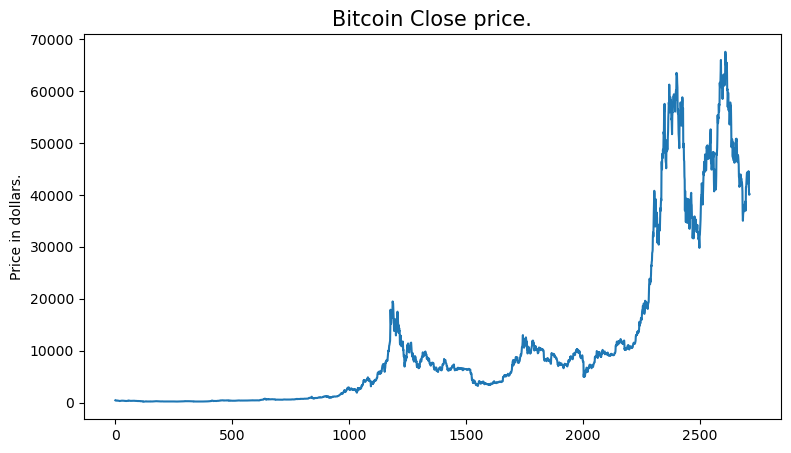

In [29]:
plt.figure(figsize=(9, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df[df['Close'] == df['Adj Close']].shape, df.shape

In [30]:
df = df.drop(['Adj Close'], axis=1)

In [31]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\Aakash\AppData\Local\Temp\ipykernel_20224\543800325.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Aakash\Downloads\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\AppData\Local\Temp\ipykernel_20224\543800325.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

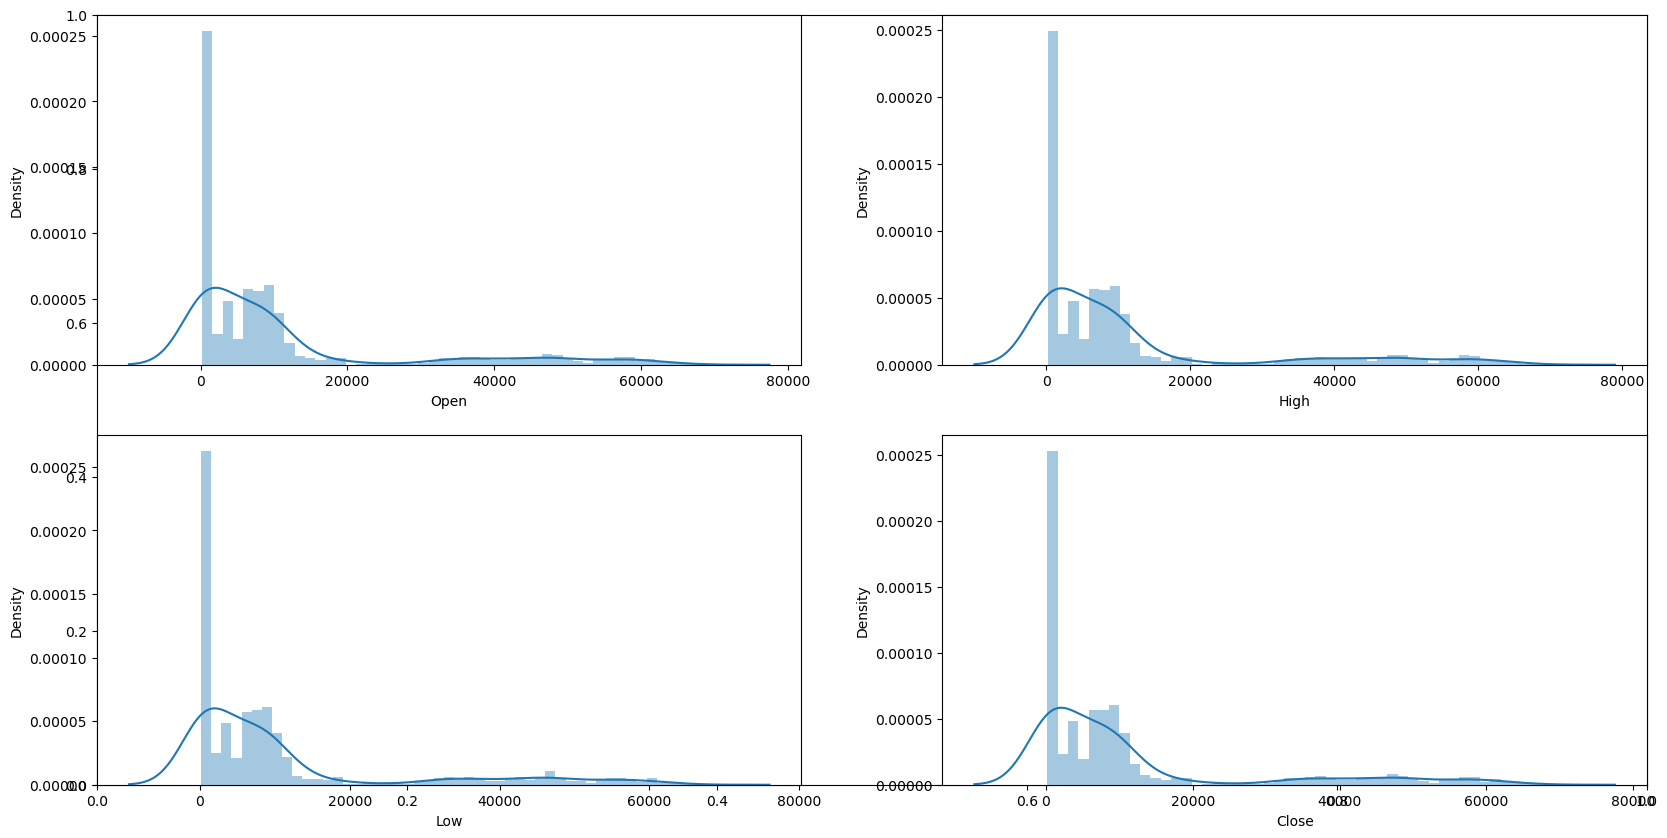

In [32]:
#enumerate(features) is used to loop through each feature in the features list. It returns the index i (used for subplot positioning) and the column name col (used to specify the data to plot).
#i+1 is necessary for subplot indexing since plt.subplot() starts from 1, not 0.
#plt.subplot(2, 2, i+1) specifies a 2x2 grid of subplots (2 rows and 2 columns), and i+1 tells which position the current subplot should occupy (from 1 to 4).

features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

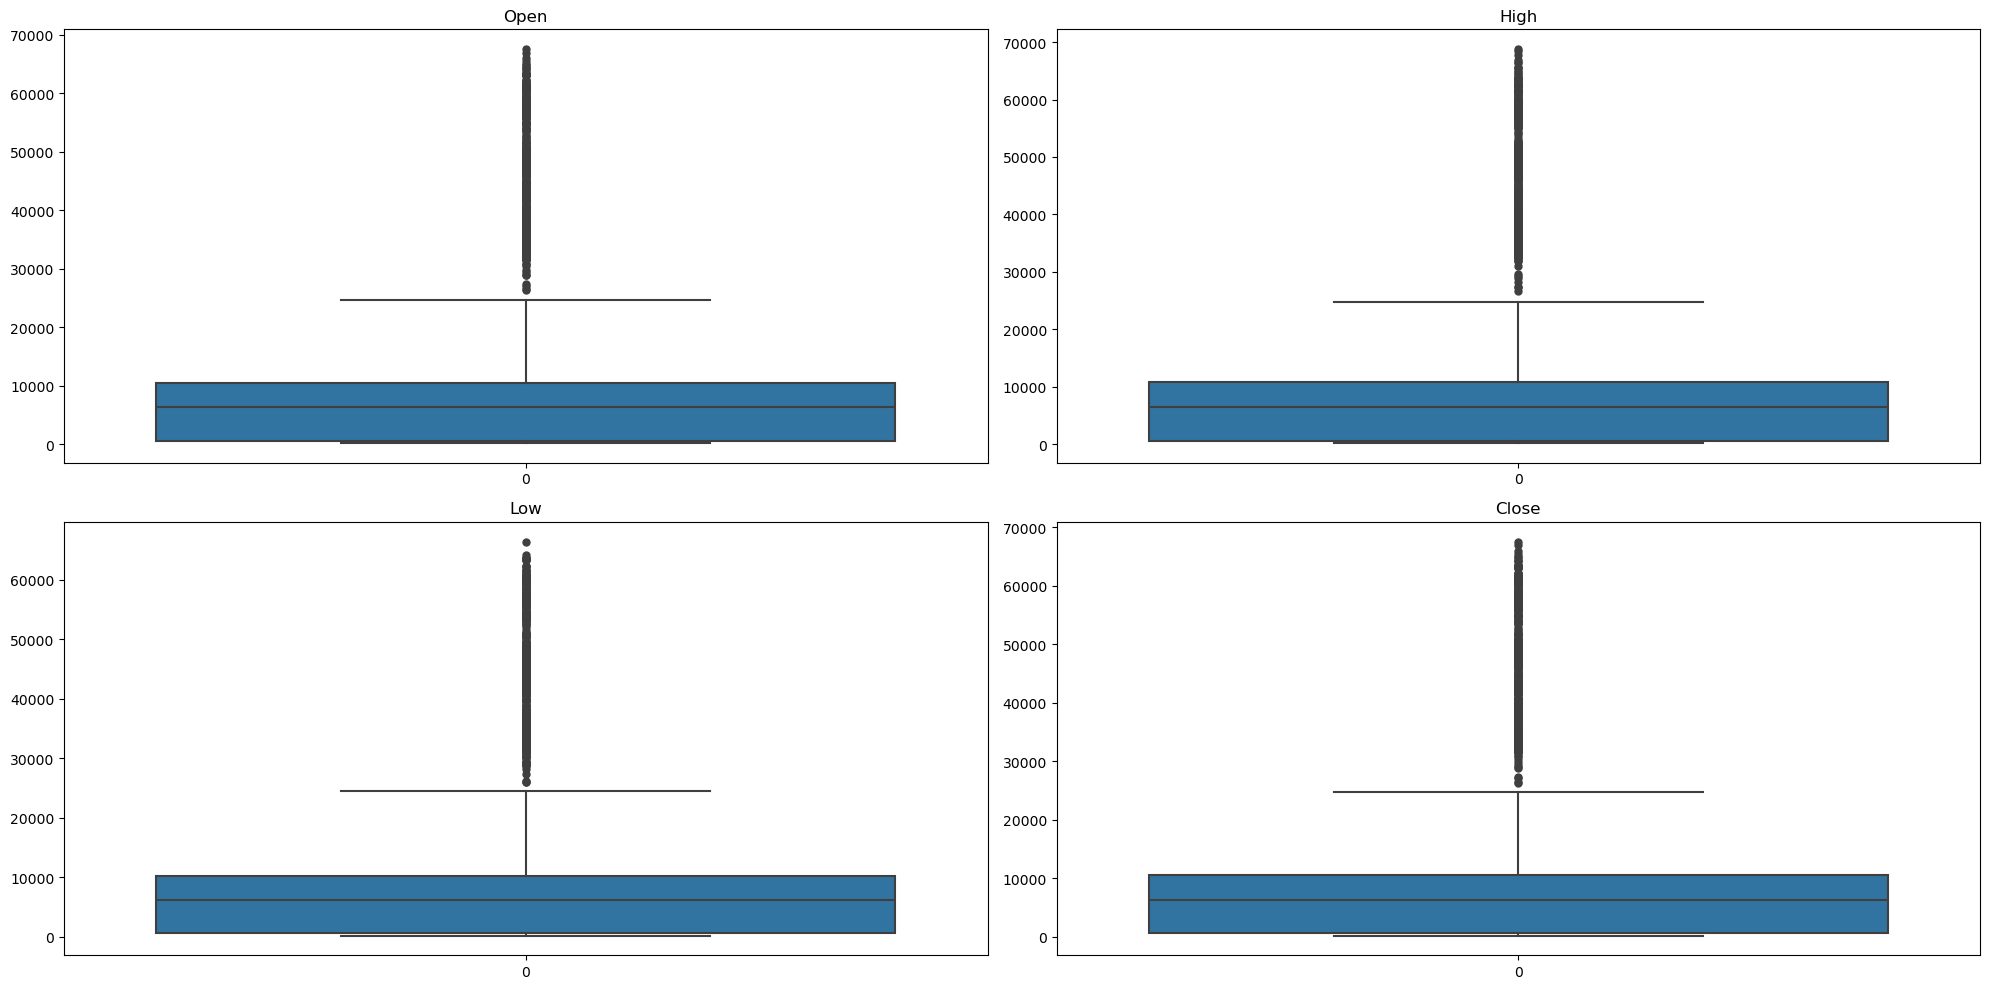

In [37]:

features = ['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(20, 10))

# Plot each feature in a subplot
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sb.boxplot(df[col], flierprops=dict(marker='o', markersize=5, color='red'))  # Adjust marker size and color for visibility of outliers
    plt.title(col)  

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()


In [ ]:
#Feature Engineering

In [35]:
# Specify the format explicitly
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Adjust if format is different
# OR, use dayfirst=True if the format is day-month-year
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Now, split the Date column into year, month, and day without ambiguity
splitted = df['Date'].dt
df['year'] = splitted.year
df['month'] = splitted.month
df['day'] = splitted.day

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21


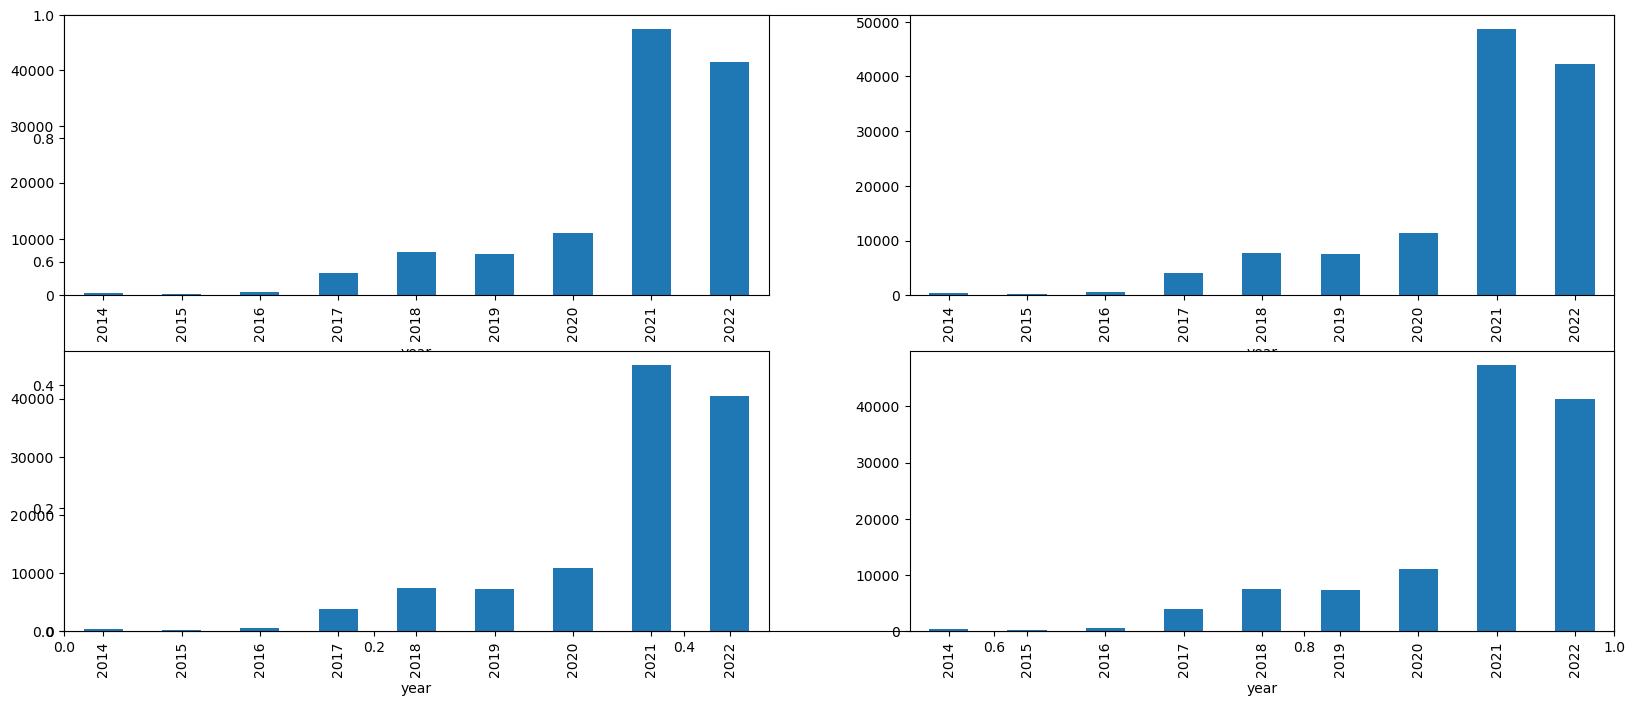

In [41]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,8))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [42]:
#quarter end will proceed with 3 table , whereas 0 = false , 1 = true
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21,1


In [43]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

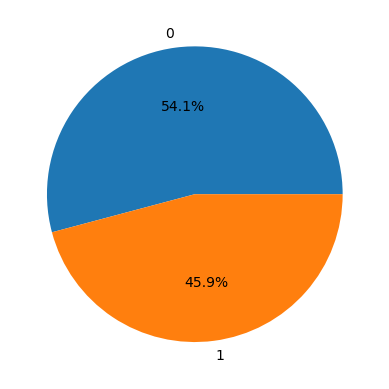

In [47]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

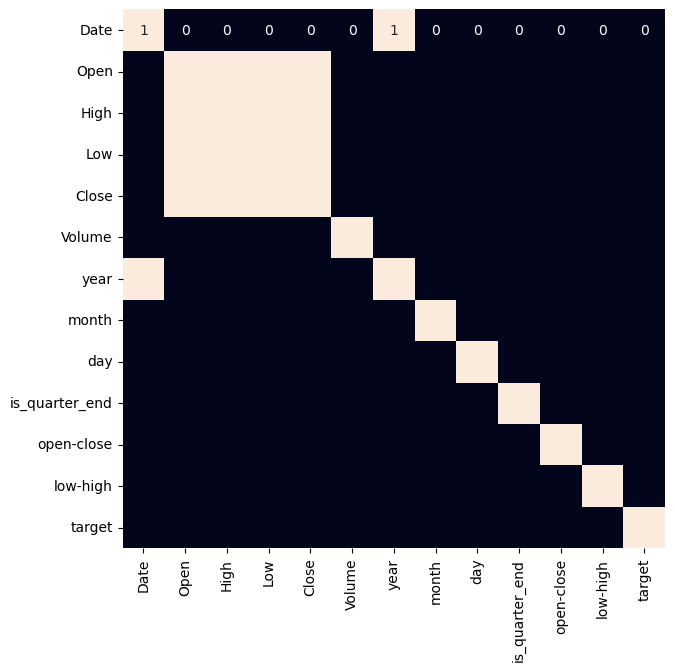

In [50]:
plt.figure(figsize=(7, 7))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

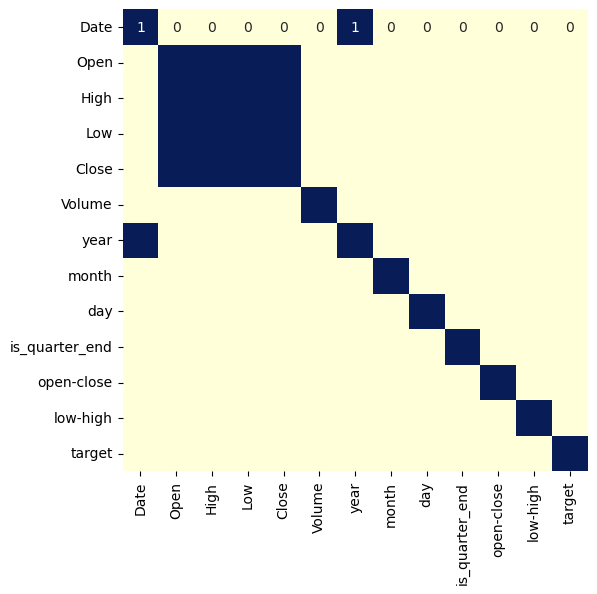

In [56]:

plt.figure(figsize=(6,6 ))

# Create a binary correlation matrix where 1 indicates correlation > 0.9 and 0 otherwise
correlation_matrix = (df.corr() > 0.9).astype(int)

# Display the heatmap with a binary color map
sb.heatmap(correlation_matrix, annot=True, cbar=False, cmap="YlGnBu", fmt='d')

# Show the plot
plt.show()


In [57]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2441, 3) (272, 3)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Define models list with alternative to XGBClassifier
models = [
    LogisticRegression(), 
    SVC(kernel='poly', probability=True), 
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, Y_train)
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5272665077085648
Validation Accuracy :  0.5194460972575323

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4824396455956864
Validation Accuracy :  0.5252880402444962

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.4784172661870504



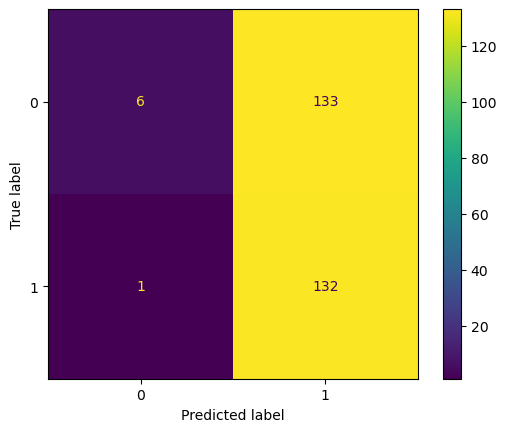

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

# This code is modified by Susobhan Akhuli
